<a href="https://colab.research.google.com/github/Gus-1003/TADS_Projeto_PalmaS/blob/main/ExperimentoCirculosBrancos/Ultimate_Circulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import math # Calculos de área e circunferencia
import numpy as np # Manipulação de matrizes
from scipy import stats # fornece ferramentas adicionais para computação de arrays e fornece estruturas de dados especializadas, como matrizes esparsas e árvores k-dimensional.

import pandas as pd # Manipulação de dados
import seaborn as sns #biblioteca de visualização de dados Python baseada em matplotlib.

from sklearn.cluster import KMeans # Criação de inteligencia artificial

import cv2 #OpenCV - Manipulação da Imagem
from google.colab.patches import cv2_imshow

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


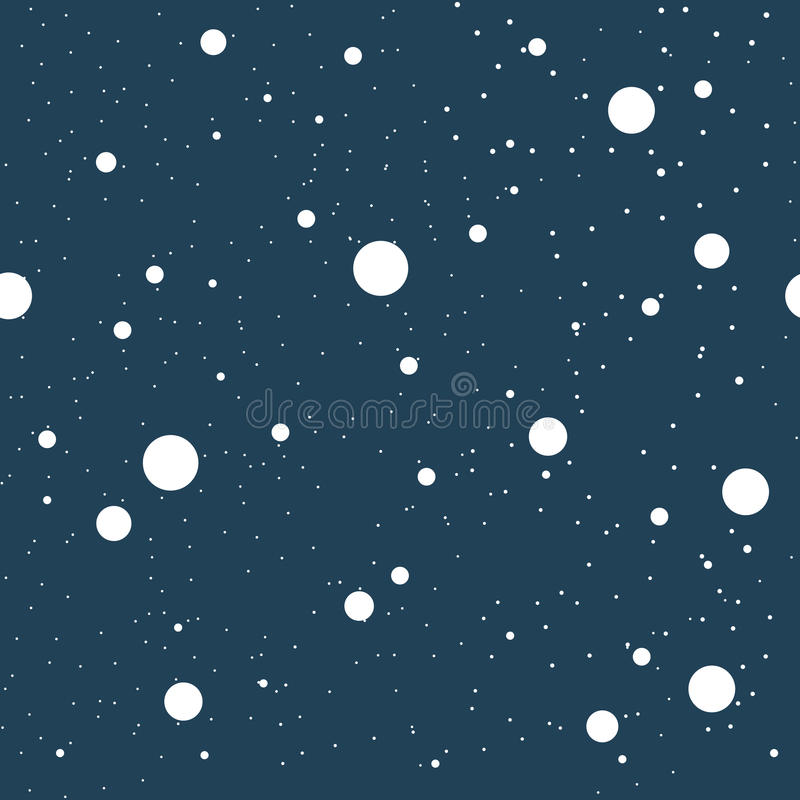

In [ ]:
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/fig_control_1.jpg")
cv2_imshow(im)

In [ ]:
print(im.shape) 

(800, 800, 3)


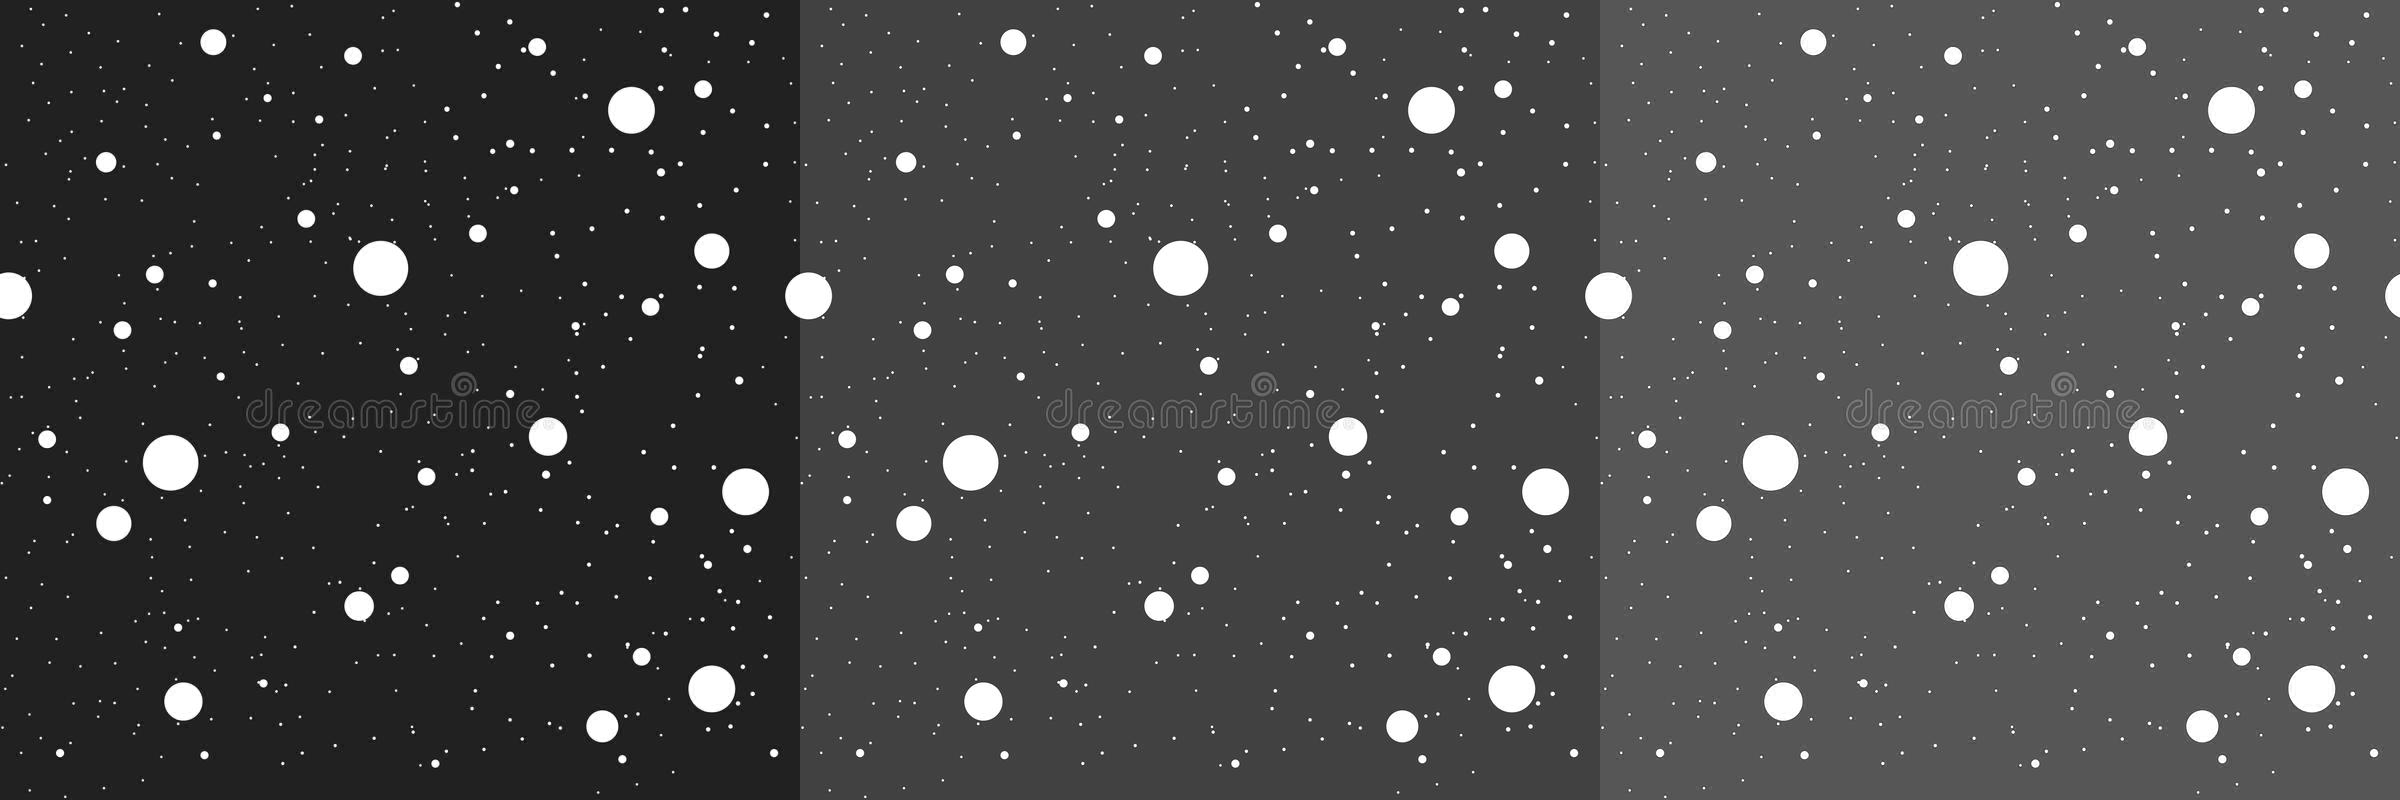

In [ ]:
im_copy = im.copy() # Clona a Imagem original (Alterações no clone não afetam a imagem original);

(B, G, R) = cv2.split(im) #Split = Método para a divisão da imagem nos 3 canais de intensidade
cv2_imshow(cv2.hconcat([R, G, B])) #hconcat = Concatena imagens Horizontalmente

In [ ]:
def resize(im): #Função resize = Redimensiona a imagem de acordo com as dimensões relatadas(x,y)
  return cv2.resize(im, (0,0), fx=0.5, fy=0.5) 

In [ ]:
print(im.shape) 

(800, 800, 3)


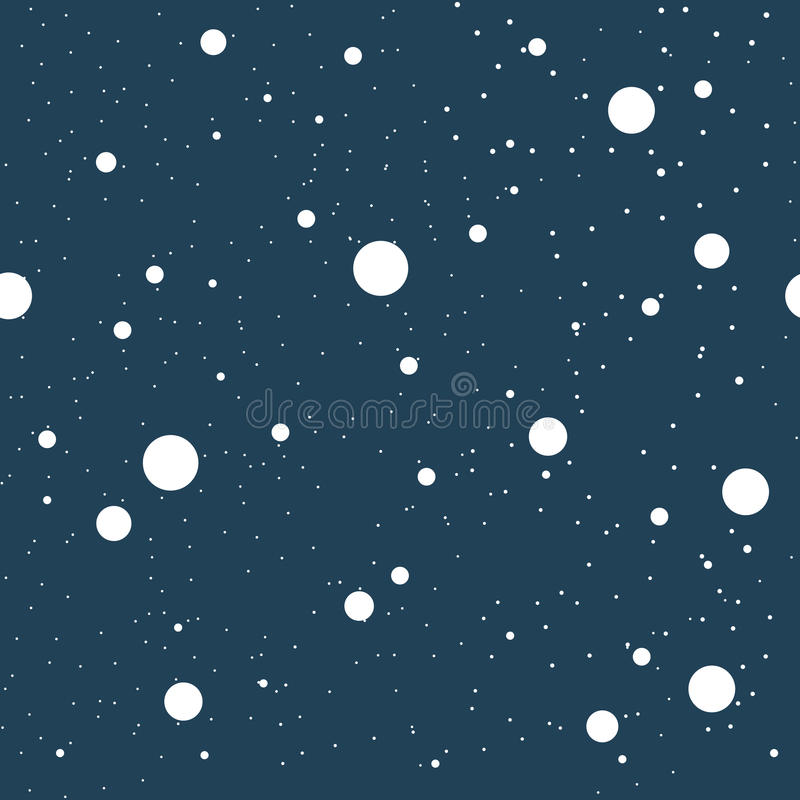

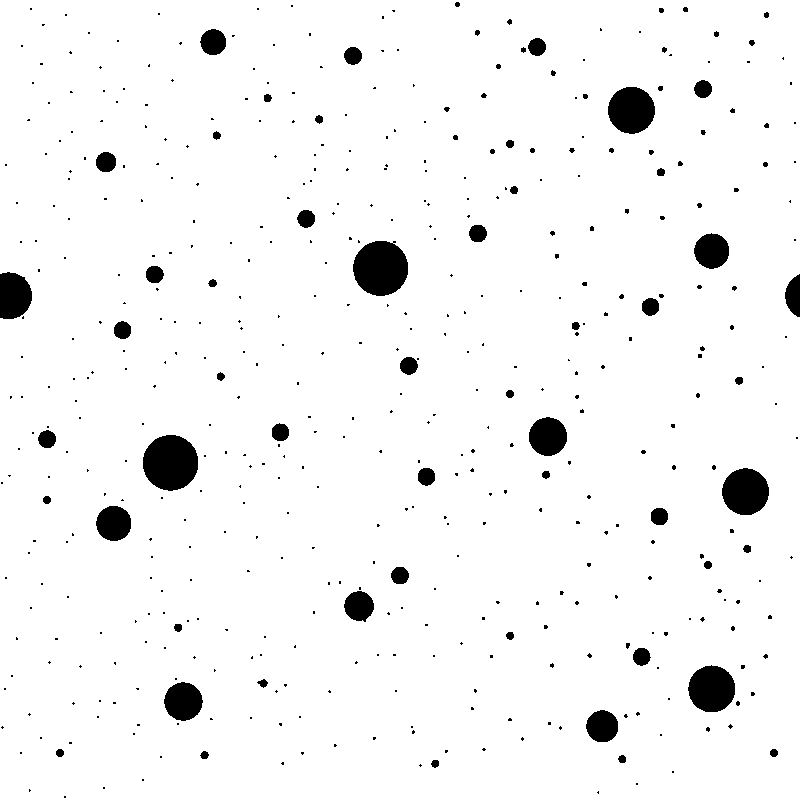

In [ ]:
ret, thresh = cv2.threshold(R, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2_imshow(im)
cv2_imshow(thresh)

In [ ]:
def extract_image(im, cnt):
  # np.zeros: Cria uma matriz com determinadas dimensões
  im_blank = np.zeros(im.shape, np.uint8) 
  cv2.drawContours(im_blank, [cnt], -1, 255, -1)
  mask = im_blank == 255
  im_filter = im[mask]
  return im_filter

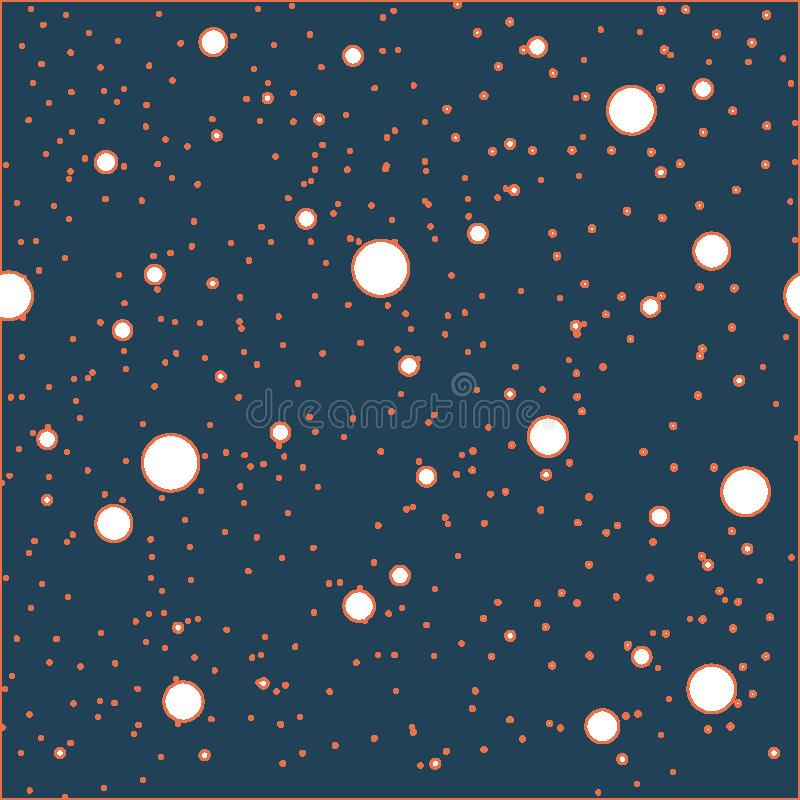

In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cells = [] # Criação da lista de celulas

for cnt in contours:
  M = cv2.moments(cnt)
  x, y, width, height = cv2.boundingRect(cnt)
  rect = cv2.minAreaRect(cnt)
  circle = cv2.minEnclosingCircle(cnt)

  r = extract_image(R, cnt)
  g = extract_image(G, cnt)
  b = extract_image(B, cnt)

  cell = {
    #'area': cv2.contourArea(cnt),
    #'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    #'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    #'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    #'perimeter': cv2.arcLength(cnt,True),
    #'width': width,
    #'height': height,
    #'angle': rect[2],
    #'radius': circle[1],

    'r_mean': np.mean(r) ,
    'r_max': np.max(r),
    'r_min': np.min(r),
    'r_std_dev': np.std(r),

    'g_mean': np.mean(g),
    'g_max': np.max(g),
    'g_min': np.min(g),
    'g_std_dev': np.std(g),

    'b_mean': np.mean(b),
    'b_max': np.max(b),
    'b_min': np.min(b),
    'b_std_dev': np.std(b)
  }

  cells.append(cell)

im = cv2.drawContours(im, contours, -1, (73, 113, 232), thickness=2)
cv2_imshow(im)

In [ ]:
df = pd.DataFrame(cells)
df.describe()

,r_mean,r_max,r_min,r_std_dev,g_mean,g_max,g_min,g_std_dev,b_mean,b_max,b_min,b_std_dev
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,133.357624,-10.063655,31.492813,73.614367,152.411745,-1.094456,57.357290,68.412735,164.026935,-1.014374,72.977413,63.894615
std,29.103978,6.763955,13.756684,7.821495,24.315604,0.547450,13.657768,6.324916,21.333212,0.243852,14.170824,5.833267
min,41.637664,-24.000000,0.000000,41.231369,72.412691,-6.000000,20.000000,35.536725,92.557651,-6.000000,34.000000,31.695943
25%,115.541667,-16.000000,22.000000,68.598179,138.000000,-1.000000,48.000000,65.067952,151.213235,-1.000000,63.000000,60.883249
50%,123.583333,-11.000000,30.000000,72.552806,145.083333,-1.000000,57.000000,68.027641,158.000000,-1.000000,72.000000,63.874008
75%,142.675000,-2.000000,40.000000,79.137073,159.105263,-1.000000,65.000000,73.179212,169.475000,-1.000000,82.000000,67.901484
max,239.999226,-1.000000,77.000000,91.794822,242.071567,-1.000000,104.000000,81.800034,243.215861,-1.000000,121.000000,75.988136


In [ ]:
df.shape

(487, 12)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df) # Metodo fit

KMeans(n_clusters=4)

In [ ]:
conts = [] #Lista de contornos

conts.append([])
conts.append([])
conts.append([])

for cont, cnt in enumerate(contours):
  cat = kmeans.predict([df.iloc[cont]])[0] #Método Predict
  conts[cat-1].append(cnt)

im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), thickness=2)
im = cv2.drawContours(im, conts[2], -1, (82, 184, 10), thickness=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/pytho

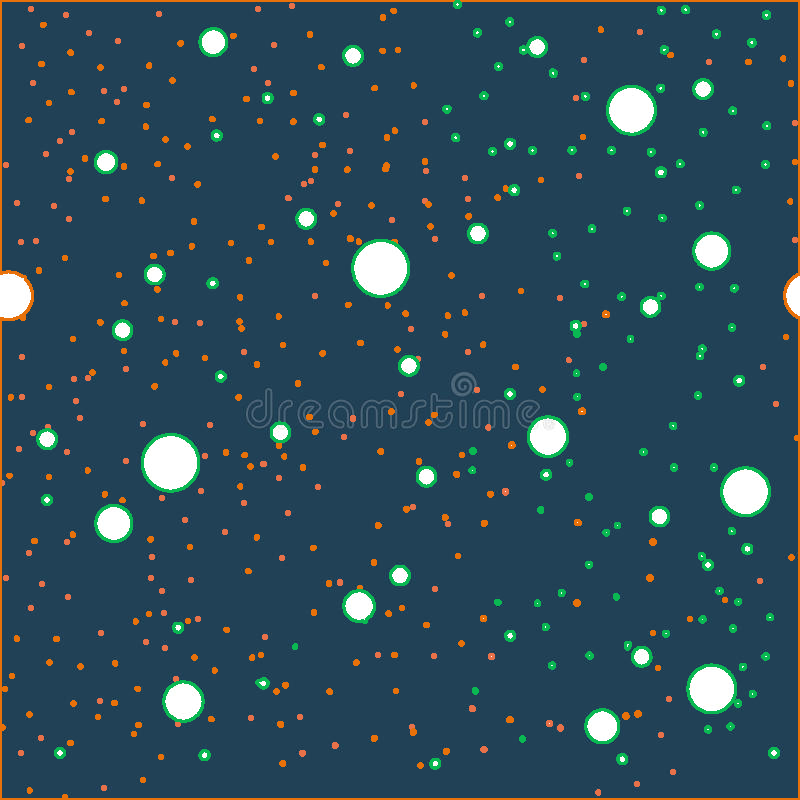

In [ ]:
cv2_imshow(im)

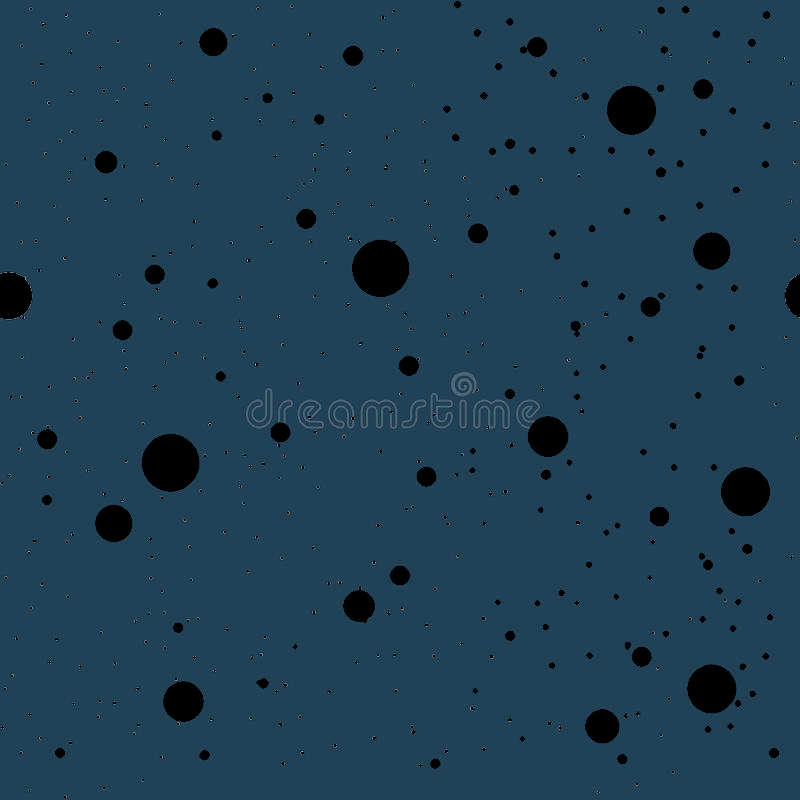

In [ ]:
im_copy

t1 = cv2.drawContours(thresh.copy(), conts[0], -1, 0, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1, conts[0], -1, 0, thickness=cv2.FILLED)
t1 = cv2.bitwise_and(im_copy, im_copy, t1, t1) 

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 0, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2, conts[2], -1, 0, thickness=cv2.FILLED)
t2 = cv2.bitwise_and(im_copy, im_copy, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[2], -1, 0, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3, conts[2], -1, 0, thickness=cv2.FILLED)
t3 = cv2.bitwise_and(im_copy, im_copy, t3, t3)

cv2_imshow(t3) # A t1 é a unica que possui cor

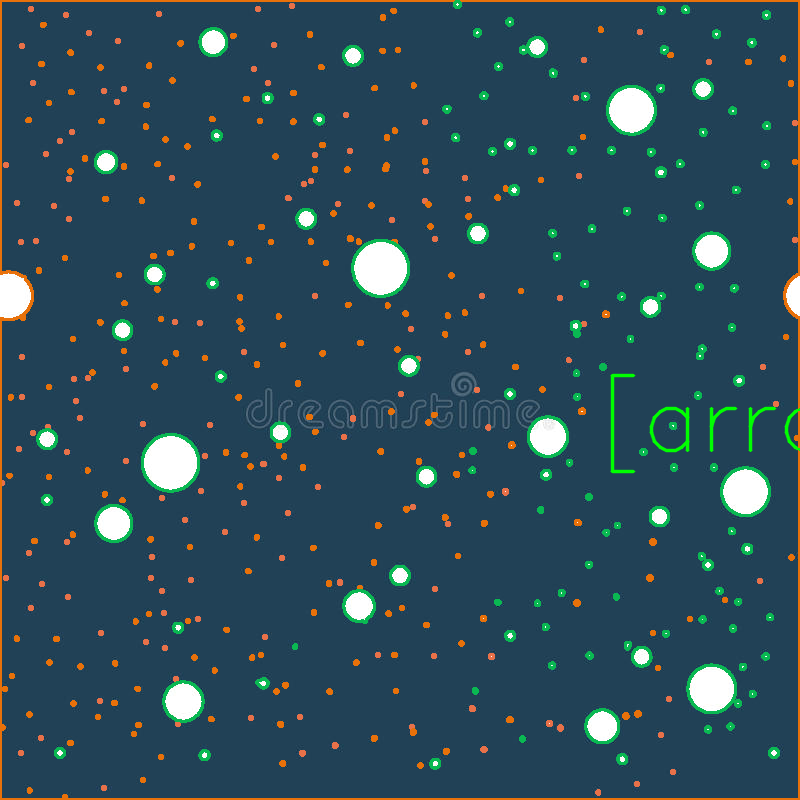

In [ ]:
im_gray = im
t1 = cv2.drawContours(thresh.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t1 = cv2.bitwise_not(t1)
t1 = cv2.bitwise_and(im_gray, im_gray, t1, t1)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, str(conts[0]) + ' cells', (600,450), font, 3, (0, 255, 0), 2, cv2.LINE_AA)

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t2 = cv2.bitwise_not(t2)
t2 = cv2.bitwise_and(im_gray, im_gray, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t3 = cv2.bitwise_not(t3)
t3 = cv2.bitwise_and(im_gray, im_gray, t3, t3)

cv2_imshow(im_gray)

In [ ]:
# cv2.copyMakeBorder() método é usado para criar uma borda em torno da imagem como um quadro de fotos.
#im_gray = cv2.copyMakeBorder(im_gray, 1,1,1,1, cv2.BORDER_CONSTANT, value=0)
im_gray = cv2.cvtColor(im_gray, cv2.COLOR_BGR2GRAY)
# Binarização automática (OTSU)
ret, thresh = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#cv2_imshow(im_gray)


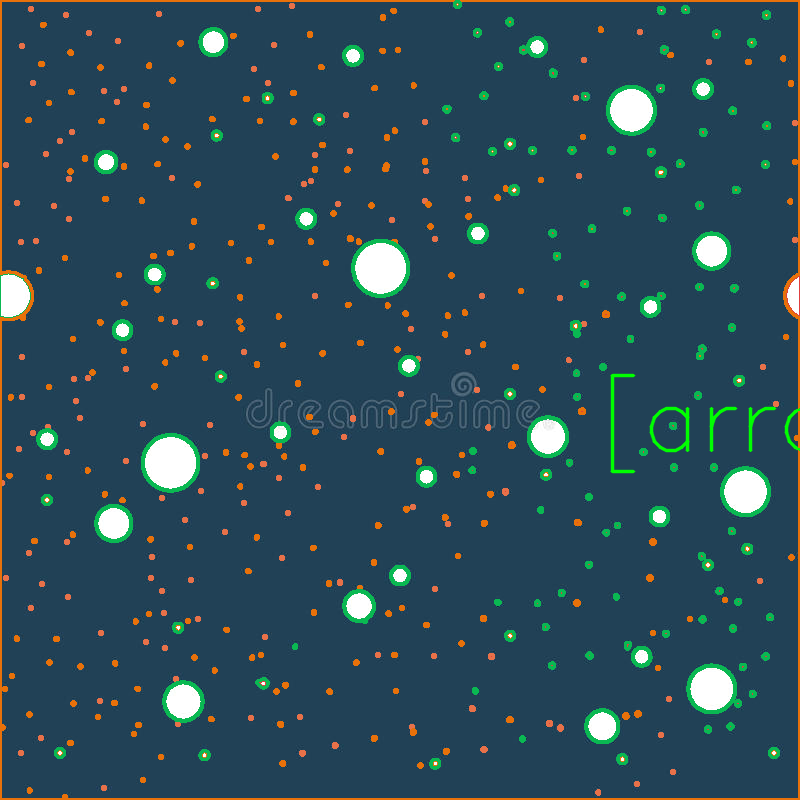

In [ ]:
#Pegando os contornos, suas características e desenhando na imagem
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


cells = []
cnts = []

cnt1 = []
cnt2 = []
for cnt in contours:
  M = cv2.moments(cnt)
  x, y, width, height = cv2.boundingRect(cnt)
  rect = cv2.minAreaRect(cnt)
  circle = cv2.minEnclosingCircle(cnt)


  im_blank = np.zeros(im_gray.shape, np.uint8)
  cv2.drawContours(im_blank, [cnt], -1, (255, 255, 255), -1)
  mask = im_blank == 255
  im_filter = im_gray[mask]

  cell = {
    'centroid': [int(M['m10']/(M['m00']+0.0000001)), int(M['m01']/(M['m00']+0.0000001))], #[x, y]
    'area': cv2.contourArea(cnt),
    'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'perimeter': cv2.arcLength(cnt,True),
    'boundingBox': [x, y, x+width, y+height],
    'width': width,
    'height': height,
    'angle': rect[2],
    'radius': circle[1], #Raio do menor círculo que cabe o objeto
    'mean': np.mean(im_gray[mask]),
    'max': np.max(im_gray[mask]),
    'min': np.min(im_gray[mask]),
    'std_dev': np.std(im_gray[mask]),
    'mode': stats.mode(im_gray[mask], axis = None),    
  }

  cell2 = {
    'area': cv2.contourArea(cnt),
    'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'perimeter': cv2.arcLength(cnt,True),
    'width': width,
    'height': height,
    'angle': rect[2],
    'radius': circle[1], #Raio do menor círculo que cabe o objeto
    'mean': np.mean(im_gray[mask]),
    'max': np.max(im_gray[mask]),
    'min': np.min(im_gray[mask]),
    'std_dev': np.std(im_gray[mask]),
  }

  if(cell['area']<20000):
    cells.append(cell2)
    cnts.append(cnt)
    
  if(cell['area']>40):
    cnt1.append(cnt)
  if(cell['area_convex_perc']>0.4):
    cnt2.append(cnt)

im_contours = cv2.drawContours(im, cnts, -1, (10, 113, 232), 1)
im_contours = cv2.drawContours(im, cnt1, -1, (82, 184, 10), 1)
im_contours = cv2.drawContours(im, cnt2, -1, (62, 62, 224), 1)

cv2_imshow(im_contours)

In [ ]:
df = pd.DataFrame(cells)
df

,area,area_convex,area_perc,area_convex_perc,perimeter,width,height,angle,radius,mean,max,min,std_dev
0,14.5,5.537441,0.723645,0.276355,14.242641,5,5,-0.0,2.525493,249.772727,-1,-21,5.035617
1,15.5,5.739167,0.729784,0.270216,15.071068,5,6,-0.0,2.600122,250.043478,-1,-16,4.196046
2,15.5,5.739167,0.729784,0.270216,15.071068,5,6,-0.0,2.600122,250.217391,-1,-20,5.732869
3,17.0,3.421953,0.832438,0.167562,15.313708,6,6,-45.0,2.549610,250.833333,-1,-13,3.555122
4,17.0,3.421953,0.832438,0.167562,15.313708,6,6,-45.0,2.549610,251.666667,-1,-12,3.210227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.0,0.571241,0.636440,0.363560,4.000000,2,2,-90.0,0.707207,245.250000,-2,-18,5.973902
132,3.0,1.909524,0.611057,0.388943,6.828427,3,3,-90.0,1.250100,249.428571,-2,-14,4.499433
133,2.5,1.864214,0.572841,0.427159,6.242641,3,3,-45.0,1.178632,248.333333,-2,-12,3.815174
134,2.5,1.863956,0.572875,0.427125,6.242641,3,3,-45.0,1.178597,250.666667,-1,-13,4.496913


In [ ]:
df.columns

Index(['area', 'area_convex', 'area_perc', 'area_convex_perc', 'perimeter',
       'width', 'height', 'angle', 'radius', 'mean', 'max', 'min', 'std_dev'],
      dtype='object')

In [ ]:
df.describe()

,area,area_convex,area_perc,area_convex_perc,perimeter,width,height,angle,radius,mean,max,min,std_dev
count,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,133.727941,2.013422e+01,0.486867,0.513133,22.704676,7.720588,7.963235,-28.922316,3.716654,249.076162,-2.948529,-17.183824,4.242244
std,371.873903,8.471369e+01,0.350120,0.350120,37.883118,11.187752,11.849306,41.739016,5.951705,4.504500,4.554721,7.523989,2.726629
min,0.000000,3.141592e-08,0.000000,0.038571,0.000000,1.000000,1.000000,-90.000000,0.000100,227.000000,-29.000000,-40.000000,0.000000
25%,0.000000,7.857124e-01,0.000000,0.246984,2.000000,2.000000,2.000000,-45.000000,0.500100,247.250000,-2.000000,-22.000000,2.504786
50%,1.750000,1.863963e+00,0.636440,0.363560,5.535534,3.000000,3.000000,-45.000000,1.000100,249.761364,-1.500000,-18.000000,4.345047
75%,17.000000,6.464338e+00,0.753016,1.000000,15.899495,6.000000,6.000000,0.000000,2.688800,251.962157,-1.000000,-12.000000,5.553801
max,2133.500000,8.393881e+02,0.961429,1.000000,173.095454,53.000000,54.000000,90.000000,26.647629,255.000000,-1.000000,-1.000000,15.500000


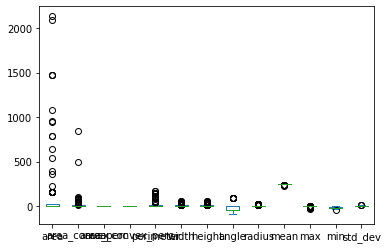

In [ ]:
df.plot(kind = 'box') 

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [ ]:
list(cells[0].values())

[14.5,
 5.537441192460495,
 0.7236452928658339,
 0.27635470713416604,
 14.242640614509583,
 5,
 5,
 -0.0,
 2.5254931449890137,
 249.77272727272728,
 255,
 235,
 5.035616944975951]

In [ ]:
conts = []

conts.append([])
conts.append([])
conts.append([])

for cont, cnt in enumerate(cnts):
  cat = kmeans.predict([df.iloc[cont]])[0]
  conts[cat-1].append(cnt)

im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/fig_control_1.jpg")
#im = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)
thresh = cv2.drawContours(thresh, conts[0], -1, 255, thickness=cv2.FILLED)

#im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), 1)
#im = cv2.drawContours(im, conts[1], -1, (82, 184, 10), 1)
#im = cv2.drawContours(im, conts[2], -1, (62, 62, 224), 1)

im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), thickness=cv2.FILLED)
im = cv2.drawContours(im, conts[1], -1, (82, 184, 10), thickness=cv2.FILLED)
im = cv2.drawContours(im, conts[2], -1, (62, 62, 224), thickness=cv2.FILLED)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/pytho

In [ ]:
im_gray = im
t1 = cv2.drawContours(thresh.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t1 = cv2.bitwise_not(t1)
#t1 = cv2.bitwise_and(im_gray, t1, t1)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, str(conts[0]) + ' cells', (600,450), font, 3, (0, 255, 0), 2, cv2.LINE_AA)

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t2 = cv2.bitwise_not(t2)
#t2 = cv2.bitwise_and(im_gray, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t3 = cv2.bitwise_not(t3)
#t3 = cv2.bitwise_and(im_gray, t3, t3)

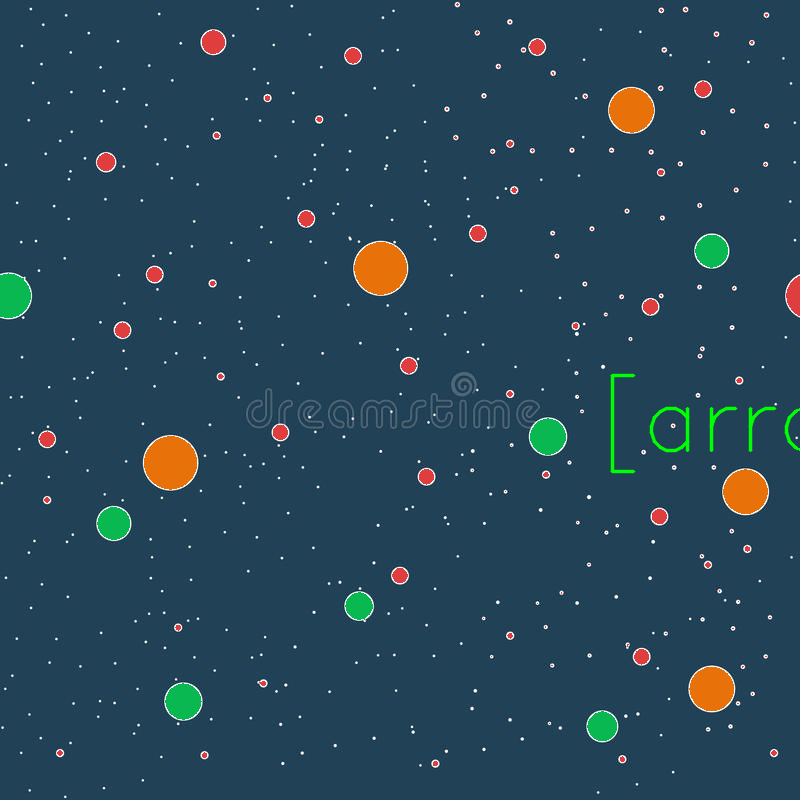

In [ ]:
cv2_imshow(im)

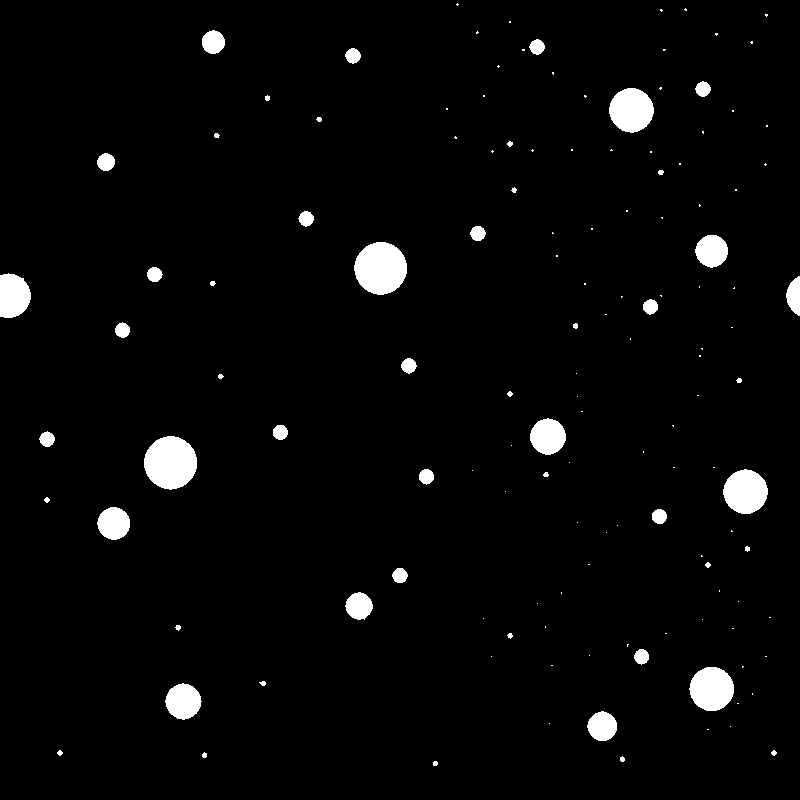

In [ ]:
cv2_imshow(thresh)